<font size='5'> <center> <u>**Addressing XOR Problem: MLP Classifier**</u></center></font>

This notebook demonstrate basic data that shows XOR problem and how to solve it using MLP Classifier. The tensorboard playground can be found here: https://playground.tensorflow.org/

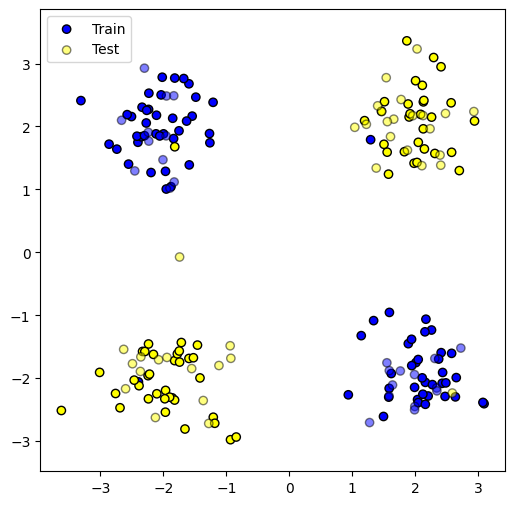

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
np.random.seed(42)

# Generate random data for the four clusters
def generate_cluster_data(num_points, center_x, center_y, spread):
    return np.random.randn(num_points, 2) * spread + np.array([center_x, center_y])

# Generate data for each cluster
dps_each_cluster = 50
cluster1 = generate_cluster_data(dps_each_cluster, -2, 2, 0.5)
cluster2 = generate_cluster_data(dps_each_cluster, 2, 2, 0.5)
cluster3 = generate_cluster_data(dps_each_cluster, -2, -2, 0.5)
cluster4 = generate_cluster_data(dps_each_cluster, 2, -2, 0.5)

# Combine the data into one dataset
data = np.vstack([cluster1, cluster2, cluster3, cluster4])
labels = np.array([0] * dps_each_cluster + [1] * dps_each_cluster + [2] * dps_each_cluster + [3] * dps_each_cluster)

# Define colors for the clusters
colors = ['blue'] * dps_each_cluster + ['yellow'] * dps_each_cluster + ['yellow'] * dps_each_cluster + ['blue'] * dps_each_cluster

# Introduce noise by changing one random point's color in each cluster
clusters_start_indices = [0, dps_each_cluster, 2 * dps_each_cluster, 3 * dps_each_cluster]
for start_index in clusters_start_indices:
    random_index = np.random.randint(start_index, start_index + dps_each_cluster)
    colors[random_index] = 'yellow' if colors[random_index] == 'blue' else 'blue'


# # Split the data into training and test sets
X_train, X_test, y_train, y_test, colors_train, colors_test = train_test_split(data, labels, colors, test_size=0.3, random_state=42)

# Plot the training data
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors_train, edgecolor='black', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=colors_test, edgecolor='black', alpha=0.5, label='Test')
plt.legend()
plt.axis('equal')
plt.show()


**XOR Model**


In [6]:
import torch.nn as nn
import torch.nn.init as init

model = nn.Sequential(
    nn.Linear(2, 2),
    nn.Sigmoid(),
    nn.Linear(2, 1),
)

def weights_init(m):
    if isinstance(m, nn.Linear):
        init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)
model.apply(weights_init)

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

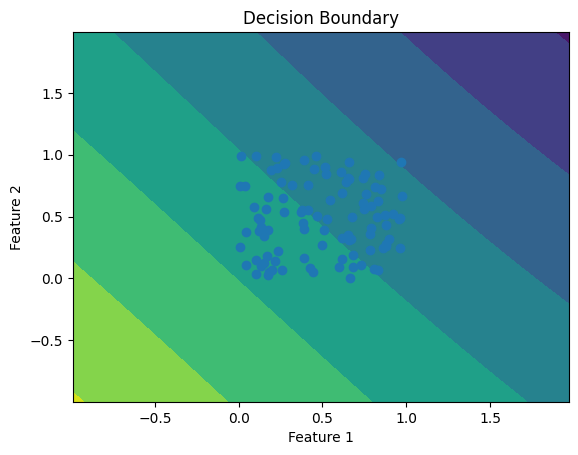

In [14]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Generate random data points
x = np.random.rand(100, 2)

# Ensure the model is in evaluation mode
model.eval()

# Create a mesh grid for plotting the decision boundary
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Flatten the grid to pass through the model
grid = np.c_[xx.ravel(), yy.ravel()]
grid_tensor = torch.tensor(grid, dtype=torch.float32)

# Pass the grid points through the model
with torch.no_grad():
    Z = model(grid_tensor).numpy()

# Reshape the output to match the grid shape
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.contourf(xx, yy, Z)
plt.scatter(x[:, 0], x[:, 1])
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# Define the neural network model with increased complexity
model = Sequential()
model.add(Dense(5, activation='sigmoid', input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))            # Output layer

# Print the model summary
model.summary()

# Compile the model with the optimizer
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


# Create a mesh grid for plotting the decision boundary
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='dashed')  # Plot the decision boundary

# Plotting the data points
plt.scatter(data[:, 0], data[:, 1], c=labels, edgecolor='k', s=50, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Neural Network Model')
plt.show()